# 텐서플로우(google) - 산업용
* 이미지 관련 라이브러리
* keras를 이용해 코딩이 쉬움
* 순차적 sequentional, functional, class

# 파이토치(meta) - 연구용
* 자연어 관련 라이브러리
* 허깅페이스, 랭체인 
* class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(np.__version__)

1.26.4


In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [6]:
data['family'] = data['SibSp'] + data['Parch']
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0


In [7]:
data = data.drop(['SibSp', 'Parch'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0


In [8]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [9]:
data['Embarked'].mode()[0]

'S'

In [10]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Embarked  891 non-null    object 
 5   family    891 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [12]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0


In [13]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Survived,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,True,False,True
1,1,1,38.0,1,False,False,False
2,1,3,26.0,0,False,False,True
3,1,1,35.0,1,False,False,True
4,0,3,35.0,0,True,False,True


In [14]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.059160,0.737695,-0.307562,0.615838
1,-1.566107,0.638789,0.059160,-1.355574,-0.307562,-1.623803
2,0.827377,-0.284663,-0.560975,-1.355574,-0.307562,0.615838
3,-1.566107,0.407926,0.059160,-1.355574,-0.307562,0.615838
4,0.827377,0.407926,-0.560975,0.737695,-0.307562,0.615838


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.7, random_state=10)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [20]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=10)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       386
           1       0.80      0.67      0.73       238

    accuracy                           0.81       624
   macro avg       0.81      0.78      0.79       624
weighted avg       0.81      0.81      0.81       624



In [21]:
# for i in range(1, 20):
#     dtc = DecisionTreeClassifier(max_depth=i, random_state=10)
#     dtc.fit(X_train, y_train)
#     pred = dtc.predict(X_test)
#     print(i)
#     print(classification_report(y_test, pred))

# Tensorflow Sequential API를 사용한 순차적 모델

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-09-10 09:33:25.555073: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 09:33:29.224240: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-09-10 09:33:29.224430: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-09-10 09:33:29.229130: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-09-10 09:33:29.849444: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


## 딥러닝 신경망 모델 정의

In [23]:
X_train

,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
247,-0.369365,-0.438572,0.679295,-1.355574,-0.307562,0.615838
5,0.827377,0.000000,-0.560975,0.737695,3.251373,-1.623803
563,0.827377,0.000000,-0.560975,0.737695,-0.307562,0.615838
636,0.827377,0.177063,-0.560975,0.737695,-0.307562,0.615838
145,-0.369365,-0.823344,0.679295,0.737695,-0.307562,0.615838
...,...,...,...,...,...,...
369,-1.566107,-0.438572,-0.560975,-1.355574,-0.307562,-1.623803
320,0.827377,-0.592481,-0.560975,0.737695,-0.307562,0.615838
527,-1.566107,0.000000,-0.560975,0.737695,-0.307562,0.615838
125,0.827377,-1.362024,0.059160,0.737695,-0.307562,-1.623803


In [24]:
X_train.shape[1]

6

In [25]:
# 신경망 모델 정의
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu')) # 입력층, input_dim: 독립변수의 컬럼 수
model.add(Dense(64, activation='relu')) # 은닉층 1
model.add(Dense(32, activation='relu')) # 은닉층 2
model.add(Dense(16, activation='relu')) # 은닉층 3
model.add(Dense(1, activation='sigmoid')) # 출력층, 이진분류: sigmoid

2024-09-10 09:33:30.435849: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 09:33:30.437280: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) RX Vega 11 Graphics)
2024-09-10 09:33:30.557345: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:33:30.557410: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-10 09:33:30.557435: I tensorflow/core/common_runtime/pluggable_device/pluggab

# 모델 파라미터 세팅 model.compile()
* loss: 오차 계산 지표 
  * 이진분류: binary_crossentropy
  * 다중분류: categorical_crossentropy
  * 데이터에 0이 많은 희소행렬인 경우: sparse_categorical_crossentropy
  * 연속형데이터(회귀분석): mse
* optimizer: learning_rate
  * adam 을 가장 많이 사용

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________


# 모델 훈련
* epochs: 전체 데이터를 한 번 훈련 하는 주기
* batch_size: 전체 데이터를 쪼개서 훈련, 메모리에 맞춰서 크기 조절
* validation_data: 검증 데이터로 모델 검증실시

In [27]:
history = model.fit(X_train, y_train, epochs = 200, batch_size=40, validation_data=(X_test, y_test))

Epoch 1/200
1/7 [===>..........................] - ETA: 4s - loss: 0.6603 - accuracy: 0.8250

2024-09-10 09:33:31.662616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:33:31.761490: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:33:31.761555: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


7/7 [==============================] - 1s 70ms/step - loss: 0.6608 - accuracy: 0.7491 - val_loss: 0.6384 - val_accuracy: 0.7853
Epoch 2/200
5/7 [====================>.........] - ETA: 0s - loss: 0.6335 - accuracy: 0.7800

2024-09-10 09:33:32.152609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:33:32.187046: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:33:32.187143: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


7/7 [==============================] - 0s 34ms/step - loss: 0.6265 - accuracy: 0.7753 - val_loss: 0.6079 - val_accuracy: 0.7788
Epoch 3/200
7/7 [==============================] - 0s 33ms/step - loss: 0.5931 - accuracy: 0.8015 - val_loss: 0.5756 - val_accuracy: 0.7981
Epoch 4/200
7/7 [==============================] - 0s 31ms/step - loss: 0.5558 - accuracy: 0.8240 - val_loss: 0.5432 - val_accuracy: 0.8061
Epoch 5/200
7/7 [==============================] - 0s 32ms/step - loss: 0.5215 - accuracy: 0.8165 - val_loss: 0.5129 - val_accuracy: 0.8109
Epoch 6/200
7/7 [==============================] - 0s 31ms/step - loss: 0.4867 - accuracy: 0.8277 - val_loss: 0.4878 - val_accuracy: 0.8077
Epoch 7/200
7/7 [==============================] - 0s 36ms/step - loss: 0.4573 - accuracy: 0.8277 - val_loss: 0.4708 - val_accuracy: 0.8125
Epoch 8/200
7/7 [==============================] - 0s 32ms/step - loss: 0.4362 - accuracy: 0.8202 - val_loss: 0.4610 - val_accuracy: 0.8077
Epoch 9/200
7/7 [===============

7/7 [==============================] - 0s 32ms/step - loss: 0.3115 - accuracy: 0.8727 - val_loss: 0.4662 - val_accuracy: 0.8109
Epoch 61/200
7/7 [==============================] - 0s 30ms/step - loss: 0.3089 - accuracy: 0.8727 - val_loss: 0.4651 - val_accuracy: 0.8173
Epoch 62/200
7/7 [==============================] - 0s 31ms/step - loss: 0.3101 - accuracy: 0.8689 - val_loss: 0.4707 - val_accuracy: 0.8125
Epoch 63/200
7/7 [==============================] - 0s 32ms/step - loss: 0.3058 - accuracy: 0.8764 - val_loss: 0.4668 - val_accuracy: 0.8173
Epoch 64/200
7/7 [==============================] - 0s 33ms/step - loss: 0.3056 - accuracy: 0.8764 - val_loss: 0.4673 - val_accuracy: 0.8173
Epoch 65/200
7/7 [==============================] - 0s 31ms/step - loss: 0.3049 - accuracy: 0.8839 - val_loss: 0.4724 - val_accuracy: 0.8141
Epoch 66/200
7/7 [==============================] - 0s 31ms/step - loss: 0.3064 - accuracy: 0.8727 - val_loss: 0.4717 - val_accuracy: 0.8141
Epoch 67/200
7/7 [========

7/7 [==============================] - 0s 32ms/step - loss: 0.2642 - accuracy: 0.8951 - val_loss: 0.5649 - val_accuracy: 0.7949
Epoch 119/200
7/7 [==============================] - 0s 32ms/step - loss: 0.2666 - accuracy: 0.8764 - val_loss: 0.5767 - val_accuracy: 0.8013
Epoch 120/200
7/7 [==============================] - 0s 32ms/step - loss: 0.2623 - accuracy: 0.8951 - val_loss: 0.5683 - val_accuracy: 0.7917
Epoch 121/200
7/7 [==============================] - 0s 32ms/step - loss: 0.2618 - accuracy: 0.8876 - val_loss: 0.5711 - val_accuracy: 0.7853
Epoch 122/200
7/7 [==============================] - 0s 32ms/step - loss: 0.2615 - accuracy: 0.8914 - val_loss: 0.5725 - val_accuracy: 0.7933
Epoch 123/200
7/7 [==============================] - 0s 32ms/step - loss: 0.2631 - accuracy: 0.8839 - val_loss: 0.5786 - val_accuracy: 0.8029
Epoch 124/200
7/7 [==============================] - 0s 32ms/step - loss: 0.2694 - accuracy: 0.8839 - val_loss: 0.5786 - val_accuracy: 0.7965
Epoch 125/200
7/7 [=

Epoch 176/200
7/7 [==============================] - 0s 37ms/step - loss: 0.2409 - accuracy: 0.8914 - val_loss: 0.6887 - val_accuracy: 0.7933
Epoch 177/200
7/7 [==============================] - 0s 33ms/step - loss: 0.2417 - accuracy: 0.8951 - val_loss: 0.7030 - val_accuracy: 0.7965
Epoch 178/200
7/7 [==============================] - 0s 41ms/step - loss: 0.2377 - accuracy: 0.8989 - val_loss: 0.6924 - val_accuracy: 0.7917
Epoch 179/200
7/7 [==============================] - 0s 39ms/step - loss: 0.2422 - accuracy: 0.8951 - val_loss: 0.6909 - val_accuracy: 0.7965
Epoch 180/200
7/7 [==============================] - 0s 36ms/step - loss: 0.2387 - accuracy: 0.8914 - val_loss: 0.7012 - val_accuracy: 0.7981
Epoch 181/200
7/7 [==============================] - 0s 37ms/step - loss: 0.2354 - accuracy: 0.8914 - val_loss: 0.6995 - val_accuracy: 0.7933
Epoch 182/200
7/7 [==============================] - 0s 44ms/step - loss: 0.2379 - accuracy: 0.8914 - val_loss: 0.7052 - val_accuracy: 0.7933
Epoch 

# 딥러닝 모델 성능 평가
* 딥러닝에서 모델의 성능을 평가하는 지표는 loss
* 보통 loss가 낮으면 accuracy가 올라가지만 비례하지 않을 때도 있음.
* 두 지표간에 차이가 있을 경우 loss가 낮은 모델이 우수한 모델

In [28]:
score = model.evaluate(X_test, y_test)
print('test loss', score[0])
print('test accuracy', score[1])

20/20 [==============================] - 0s 15ms/step - loss: 0.7402 - accuracy: 0.7901
test loss 0.7401838898658752
test accuracy 0.7900640964508057


# 딥러닝 학습결과 시각화

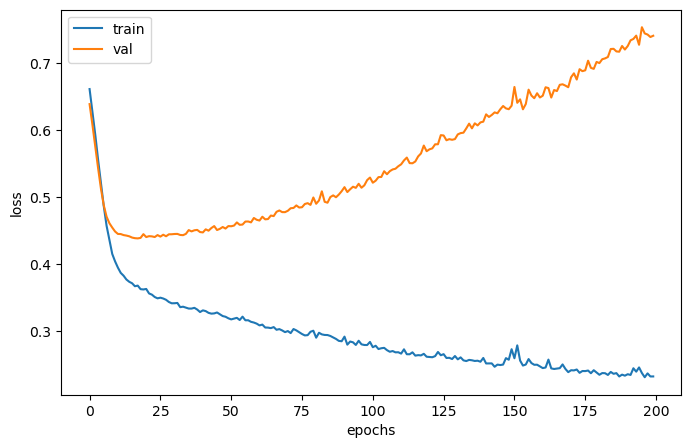

In [31]:
history.history.keys()
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

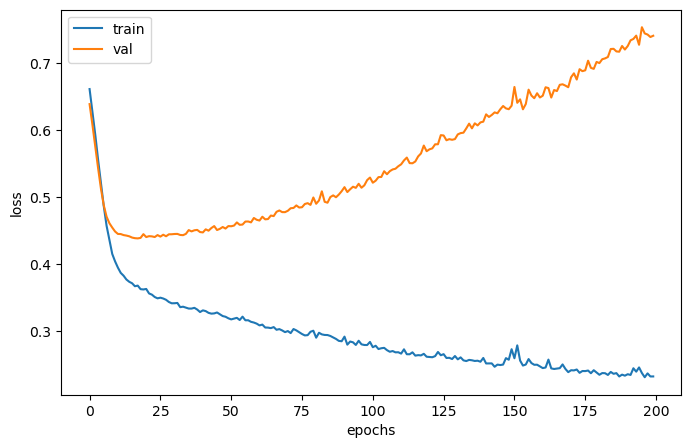

In [32]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [33]:
pred = model.predict(X_test)
pred

20/20 [==============================] - 0s 5ms/step


2024-09-10 09:34:42.676902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:34:42.797023: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:34:42.797237: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-10 09:34:42.818781: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:34:42.818865: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

array([[6.26674816e-02],
       [1.00002974e-01],
       [6.69207275e-02],
       [9.99654412e-01],
       [9.94844079e-01],
       [1.33208781e-01],
       [7.01435804e-02],
       [1.13064395e-02],
       [5.76255657e-02],
       [7.04911873e-02],
       [3.56343132e-03],
       [1.67343408e-01],
       [6.46750808e-01],
       [2.91354328e-01],
       [4.15225374e-03],
       [4.46885638e-03],
       [1.16669668e-07],
       [1.63074937e-02],
       [6.57217741e-01],
       [1.60395190e-01],
       [1.12760451e-03],
       [2.98290746e-03],
       [9.44805026e-01],
       [1.41177105e-03],
       [9.98740375e-01],
       [1.00002974e-01],
       [1.00002974e-01],
       [9.99539375e-01],
       [9.08342749e-03],
       [9.99990463e-01],
       [9.94844079e-01],
       [4.46885638e-03],
       [9.73819852e-01],
       [3.44662913e-05],
       [9.97828662e-01],
       [5.52332699e-02],
       [4.10165727e-01],
       [2.09670725e-05],
       [7.83369988e-02],
       [5.76255657e-02],


In [34]:
pred = pd.DataFrame(pred)
pred

,0
0,0.062667
1,0.100003
2,0.066921
3,0.999654
4,0.994844
...,...
619,0.027600
620,0.999798
621,0.007636
622,0.013678


In [35]:
pred = pred[0].apply(lambda x: 1 if x >= 0.3 else 0)
pred

0      0
1      0
2      0
3      1
4      1
      ..
619    0
620    1
621    0
622    0
623    0
Name: 0, Length: 624, dtype: int64

In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       386
           1       0.69      0.73      0.71       238

    accuracy                           0.77       624
   macro avg       0.76      0.76      0.76       624
weighted avg       0.78      0.77      0.77       624



# Tensorflow Functional API를 이용한 함수형 모델
* Sequential API는 단순히 층을 여러 개 쌓는 형태라 복잡한 모델 생성에 한계가 있어
* Functional API는 입력층과 출력층을 사용자가 직접 정의 가능
* 다중입력(Multi-input), 다중출력(Multi-output)등 복잡한 모델을 정의 할 수 있음
* Input(shape=(독립변수 수))로 입력층 정의
* 이전 층을 다음 층의 입력으로 사용
* model()에 입력과 출력 정의

In [37]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [38]:
inputs = Input(shape=(X_train.shape[1], )) # 입력층 정의 Input(shape=(독립변수 수, ))
x = Dense(32, activation='relu')(inputs) # 은닉층 1번
x = Dense(64, activation='relu')(x) # 은닉층 2번
x = Dense(32, activation='relu')(x) # 은닉층 3번
x = Dense(16, activation='relu')(x) # 은닉층 4번
x = Dense(1, activation='sigmoid')(x) # 출력층
model = Model(inputs, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_5 (Dense)             (None, 32)                224       
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable par

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=400, batch_size=100, validation_data=(X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test, pred))

Epoch 1/400
1/3 [=========>....................] - ETA: 1s - loss: 0.7194 - accuracy: 0.4100

2024-09-10 09:34:49.413031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:34:49.517530: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:34:49.517607: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 1s 168ms/step - loss: 0.7328 - accuracy: 0.3895 - val_loss: 0.7116 - val_accuracy: 0.3862
Epoch 2/400
1/3 [=========>....................] - ETA: 0s - loss: 0.6735 - accuracy: 0.4700

2024-09-10 09:34:49.796339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:34:49.842327: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:34:49.842402: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 0s 63ms/step - loss: 0.7008 - accuracy: 0.4157 - val_loss: 0.6879 - val_accuracy: 0.4968
Epoch 3/400
3/3 [==============================] - 0s 66ms/step - loss: 0.6788 - accuracy: 0.5768 - val_loss: 0.6680 - val_accuracy: 0.6250
Epoch 4/400
3/3 [==============================] - 0s 50ms/step - loss: 0.6574 - accuracy: 0.6142 - val_loss: 0.6526 - val_accuracy: 0.6651
Epoch 5/400
3/3 [==============================] - 0s 51ms/step - loss: 0.6418 - accuracy: 0.6742 - val_loss: 0.6404 - val_accuracy: 0.7340
Epoch 6/400
3/3 [==============================] - 0s 53ms/step - loss: 0.6274 - accuracy: 0.7678 - val_loss: 0.6287 - val_accuracy: 0.7452
Epoch 7/400
3/3 [==============================] - 0s 51ms/step - loss: 0.6117 - accuracy: 0.7828 - val_loss: 0.6166 - val_accuracy: 0.7484
Epoch 8/400
3/3 [==============================] - 0s 48ms/step - loss: 0.5971 - accuracy: 0.7903 - val_loss: 0.6038 - val_accuracy: 0.7500
Epoch 9/400
3/3 [===============

3/3 [==============================] - 0s 52ms/step - loss: 0.3239 - accuracy: 0.8689 - val_loss: 0.4727 - val_accuracy: 0.8109
Epoch 61/400
3/3 [==============================] - 0s 51ms/step - loss: 0.3222 - accuracy: 0.8689 - val_loss: 0.4740 - val_accuracy: 0.8093
Epoch 62/400
3/3 [==============================] - 0s 53ms/step - loss: 0.3207 - accuracy: 0.8652 - val_loss: 0.4747 - val_accuracy: 0.8109
Epoch 63/400
3/3 [==============================] - 0s 57ms/step - loss: 0.3200 - accuracy: 0.8652 - val_loss: 0.4756 - val_accuracy: 0.8125
Epoch 64/400
3/3 [==============================] - 0s 56ms/step - loss: 0.3181 - accuracy: 0.8689 - val_loss: 0.4769 - val_accuracy: 0.8125
Epoch 65/400
3/3 [==============================] - 0s 52ms/step - loss: 0.3167 - accuracy: 0.8689 - val_loss: 0.4785 - val_accuracy: 0.8125
Epoch 66/400
3/3 [==============================] - 0s 50ms/step - loss: 0.3156 - accuracy: 0.8727 - val_loss: 0.4801 - val_accuracy: 0.8157
Epoch 67/400
3/3 [========

3/3 [==============================] - 0s 52ms/step - loss: 0.2711 - accuracy: 0.8876 - val_loss: 0.5694 - val_accuracy: 0.7933
Epoch 119/400
3/3 [==============================] - 0s 54ms/step - loss: 0.2691 - accuracy: 0.8914 - val_loss: 0.5706 - val_accuracy: 0.7869
Epoch 120/400
3/3 [==============================] - 0s 53ms/step - loss: 0.2696 - accuracy: 0.8914 - val_loss: 0.5716 - val_accuracy: 0.7869
Epoch 121/400
3/3 [==============================] - 0s 78ms/step - loss: 0.2695 - accuracy: 0.8876 - val_loss: 0.5741 - val_accuracy: 0.7917
Epoch 122/400
3/3 [==============================] - 0s 71ms/step - loss: 0.2729 - accuracy: 0.8839 - val_loss: 0.5784 - val_accuracy: 0.8013
Epoch 123/400
3/3 [==============================] - 0s 55ms/step - loss: 0.2681 - accuracy: 0.8839 - val_loss: 0.5804 - val_accuracy: 0.7853
Epoch 124/400
3/3 [==============================] - 0s 51ms/step - loss: 0.2675 - accuracy: 0.8876 - val_loss: 0.5834 - val_accuracy: 0.7837
Epoch 125/400
3/3 [=

Epoch 176/400
3/3 [==============================] - 0s 54ms/step - loss: 0.2432 - accuracy: 0.8914 - val_loss: 0.6764 - val_accuracy: 0.7837
Epoch 177/400
3/3 [==============================] - 0s 52ms/step - loss: 0.2413 - accuracy: 0.8989 - val_loss: 0.6794 - val_accuracy: 0.7788
Epoch 178/400
3/3 [==============================] - 0s 82ms/step - loss: 0.2431 - accuracy: 0.8914 - val_loss: 0.6828 - val_accuracy: 0.7821
Epoch 179/400
3/3 [==============================] - 0s 83ms/step - loss: 0.2407 - accuracy: 0.8951 - val_loss: 0.6870 - val_accuracy: 0.7901
Epoch 180/400
3/3 [==============================] - 0s 57ms/step - loss: 0.2407 - accuracy: 0.8914 - val_loss: 0.6869 - val_accuracy: 0.7917
Epoch 181/400
3/3 [==============================] - 0s 54ms/step - loss: 0.2411 - accuracy: 0.8951 - val_loss: 0.6858 - val_accuracy: 0.7885
Epoch 182/400
3/3 [==============================] - 0s 95ms/step - loss: 0.2403 - accuracy: 0.8951 - val_loss: 0.6893 - val_accuracy: 0.7885
Epoch 

Epoch 234/400
3/3 [==============================] - 0s 83ms/step - loss: 0.2260 - accuracy: 0.8989 - val_loss: 0.8021 - val_accuracy: 0.7837
Epoch 235/400
3/3 [==============================] - 0s 84ms/step - loss: 0.2210 - accuracy: 0.9064 - val_loss: 0.8012 - val_accuracy: 0.7821
Epoch 236/400
3/3 [==============================] - 0s 53ms/step - loss: 0.2284 - accuracy: 0.8951 - val_loss: 0.8048 - val_accuracy: 0.7837
Epoch 237/400
3/3 [==============================] - 0s 55ms/step - loss: 0.2252 - accuracy: 0.8951 - val_loss: 0.8148 - val_accuracy: 0.7885
Epoch 238/400
3/3 [==============================] - 0s 89ms/step - loss: 0.2254 - accuracy: 0.9026 - val_loss: 0.8137 - val_accuracy: 0.7804
Epoch 239/400
3/3 [==============================] - 0s 84ms/step - loss: 0.2184 - accuracy: 0.8989 - val_loss: 0.8188 - val_accuracy: 0.7853
Epoch 240/400
3/3 [==============================] - 0s 94ms/step - loss: 0.2195 - accuracy: 0.8989 - val_loss: 0.8228 - val_accuracy: 0.7901
Epoch 

Epoch 292/400
3/3 [==============================] - 0s 75ms/step - loss: 0.2065 - accuracy: 0.9101 - val_loss: 0.9735 - val_accuracy: 0.7756
Epoch 293/400
3/3 [==============================] - 0s 55ms/step - loss: 0.2093 - accuracy: 0.9026 - val_loss: 0.9629 - val_accuracy: 0.7788
Epoch 294/400
3/3 [==============================] - 0s 84ms/step - loss: 0.2008 - accuracy: 0.9213 - val_loss: 0.9638 - val_accuracy: 0.7837
Epoch 295/400
3/3 [==============================] - 0s 79ms/step - loss: 0.1999 - accuracy: 0.9213 - val_loss: 0.9677 - val_accuracy: 0.7788
Epoch 296/400
3/3 [==============================] - 0s 81ms/step - loss: 0.1984 - accuracy: 0.9213 - val_loss: 0.9701 - val_accuracy: 0.7821
Epoch 297/400
3/3 [==============================] - 0s 94ms/step - loss: 0.2040 - accuracy: 0.9176 - val_loss: 0.9730 - val_accuracy: 0.7837
Epoch 298/400
3/3 [==============================] - 0s 92ms/step - loss: 0.2002 - accuracy: 0.9213 - val_loss: 0.9863 - val_accuracy: 0.7821
Epoch 

3/3 [==============================] - 0s 71ms/step - loss: 0.1887 - accuracy: 0.9251 - val_loss: 1.1290 - val_accuracy: 0.7740
Epoch 350/400
3/3 [==============================] - 0s 73ms/step - loss: 0.1944 - accuracy: 0.9101 - val_loss: 1.1201 - val_accuracy: 0.7724
Epoch 351/400
3/3 [==============================] - 0s 122ms/step - loss: 0.1910 - accuracy: 0.9139 - val_loss: 1.1172 - val_accuracy: 0.7804
Epoch 352/400
3/3 [==============================] - 0s 96ms/step - loss: 0.1906 - accuracy: 0.9251 - val_loss: 1.1222 - val_accuracy: 0.7724
Epoch 353/400
3/3 [==============================] - 0s 71ms/step - loss: 0.1861 - accuracy: 0.9288 - val_loss: 1.1228 - val_accuracy: 0.7708
Epoch 354/400
3/3 [==============================] - 0s 60ms/step - loss: 0.1860 - accuracy: 0.9251 - val_loss: 1.1229 - val_accuracy: 0.7692
Epoch 355/400
3/3 [==============================] - 0s 89ms/step - loss: 0.1863 - accuracy: 0.9251 - val_loss: 1.1291 - val_accuracy: 0.7756
Epoch 356/400
3/3 [

2024-09-10 09:35:55.189537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.80      0.85      0.82       386
           1       0.72      0.65      0.68       238

    accuracy                           0.77       624
   macro avg       0.76      0.75      0.75       624
weighted avg       0.77      0.77      0.77       624



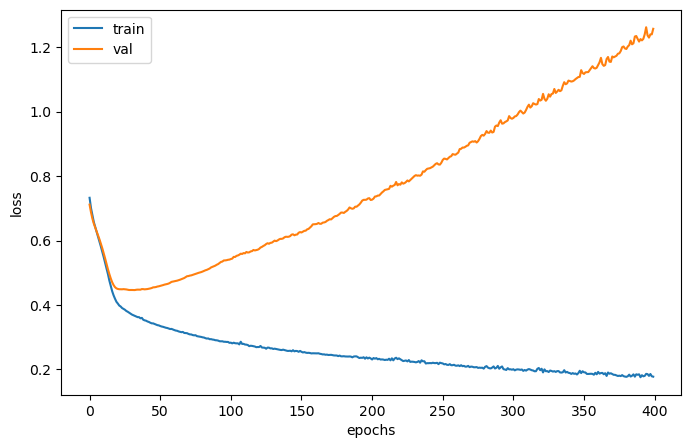

In [40]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# Model Subclassing API로 모델 만들기
* class 형태의 모델 정의 방법
* tf.keras.Model을 상속받아 작성

In [41]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [42]:
class Titanic(tf.keras.Model):
    def __init__(self):
        super(Titanic, self).__init__()
        self.dense1 = tf.keras.layers.Dense(32, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(16, activation='relu')
        self.classifier = tf.keras.layers.Dense(1, activation='sigmoid')
    
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.classifier(x)

In [43]:
model = Titanic()

In [44]:
class Titanic2(Model):
    def __init__(self):
        super(Titanic2, self).__init__()
        self.dense1 = Dense(32, activation='relu')
        self.dense2 = Dense(64, activation='relu')
        self.dense3 = Dense(16, activation='relu')
        self.dense4 = Dense(1, activation='sigmoid')
    
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [45]:
model2 = Titanic2()

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model2.fit(X_train, y_train, epochs=200, batch_size=100, validation_data=(X_test, y_test))
pred = model2.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 5 else 0)
print(classification_report(y_test, pred))

Epoch 1/200
1/3 [=========>....................] - ETA: 1s - loss: 0.2355 - accuracy: 0.9200

2024-09-10 09:37:56.512793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:37:56.590607: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:37:56.590668: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 1s 142ms/step - loss: 0.2912 - accuracy: 0.8839 - val_loss: 0.5133 - val_accuracy: 0.8013
Epoch 2/200
1/3 [=========>....................] - ETA: 0s - loss: 0.3271 - accuracy: 0.8500

2024-09-10 09:37:56.821463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:37:56.856769: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:37:56.856832: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 0s 69ms/step - loss: 0.2870 - accuracy: 0.8801 - val_loss: 0.5130 - val_accuracy: 0.8029
Epoch 3/200
3/3 [==============================] - 0s 65ms/step - loss: 0.2856 - accuracy: 0.8876 - val_loss: 0.5152 - val_accuracy: 0.7997
Epoch 4/200
3/3 [==============================] - 0s 59ms/step - loss: 0.2835 - accuracy: 0.8876 - val_loss: 0.5179 - val_accuracy: 0.8013
Epoch 5/200
3/3 [==============================] - 0s 64ms/step - loss: 0.2838 - accuracy: 0.8764 - val_loss: 0.5177 - val_accuracy: 0.8013
Epoch 6/200
3/3 [==============================] - 0s 58ms/step - loss: 0.2833 - accuracy: 0.8839 - val_loss: 0.5174 - val_accuracy: 0.8029
Epoch 7/200
3/3 [==============================] - 0s 51ms/step - loss: 0.2826 - accuracy: 0.8839 - val_loss: 0.5174 - val_accuracy: 0.8029
Epoch 8/200
3/3 [==============================] - 0s 56ms/step - loss: 0.2814 - accuracy: 0.8876 - val_loss: 0.5191 - val_accuracy: 0.8029
Epoch 9/200
3/3 [===============

3/3 [==============================] - 0s 93ms/step - loss: 0.2649 - accuracy: 0.8914 - val_loss: 0.5678 - val_accuracy: 0.7981
Epoch 61/200
3/3 [==============================] - 0s 80ms/step - loss: 0.2660 - accuracy: 0.8914 - val_loss: 0.5679 - val_accuracy: 0.7997
Epoch 62/200
3/3 [==============================] - 0s 57ms/step - loss: 0.2648 - accuracy: 0.8914 - val_loss: 0.5702 - val_accuracy: 0.7981
Epoch 63/200
3/3 [==============================] - 0s 59ms/step - loss: 0.2639 - accuracy: 0.8914 - val_loss: 0.5718 - val_accuracy: 0.7981
Epoch 64/200
3/3 [==============================] - 0s 91ms/step - loss: 0.2641 - accuracy: 0.8876 - val_loss: 0.5747 - val_accuracy: 0.7965
Epoch 65/200
3/3 [==============================] - 0s 67ms/step - loss: 0.2647 - accuracy: 0.8876 - val_loss: 0.5741 - val_accuracy: 0.7981
Epoch 66/200
3/3 [==============================] - 0s 84ms/step - loss: 0.2637 - accuracy: 0.8914 - val_loss: 0.5735 - val_accuracy: 0.7997
Epoch 67/200
3/3 [========

3/3 [==============================] - 0s 59ms/step - loss: 0.2478 - accuracy: 0.9101 - val_loss: 0.6375 - val_accuracy: 0.7917
Epoch 119/200
3/3 [==============================] - 0s 51ms/step - loss: 0.2474 - accuracy: 0.9026 - val_loss: 0.6410 - val_accuracy: 0.7885
Epoch 120/200
3/3 [==============================] - 0s 81ms/step - loss: 0.2470 - accuracy: 0.9026 - val_loss: 0.6432 - val_accuracy: 0.7885
Epoch 121/200
3/3 [==============================] - 0s 68ms/step - loss: 0.2470 - accuracy: 0.9064 - val_loss: 0.6433 - val_accuracy: 0.7901
Epoch 122/200
3/3 [==============================] - 0s 52ms/step - loss: 0.2464 - accuracy: 0.9064 - val_loss: 0.6449 - val_accuracy: 0.7901
Epoch 123/200
3/3 [==============================] - 0s 68ms/step - loss: 0.2475 - accuracy: 0.9026 - val_loss: 0.6495 - val_accuracy: 0.7837
Epoch 124/200
3/3 [==============================] - 0s 95ms/step - loss: 0.2465 - accuracy: 0.9026 - val_loss: 0.6508 - val_accuracy: 0.7869
Epoch 125/200
3/3 [=

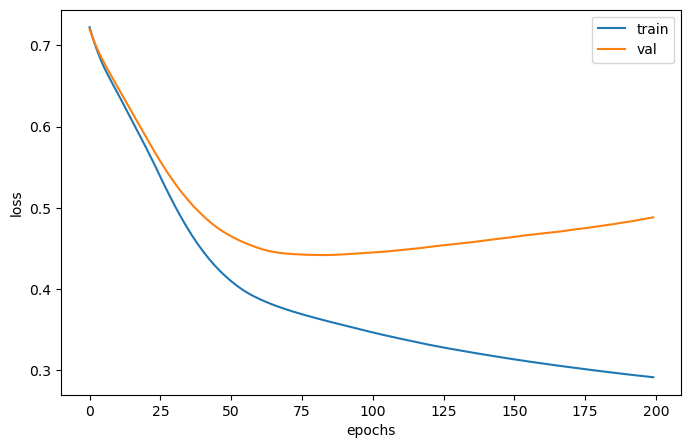

In [78]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()